# Determining the value of automobiles

The "Belka car" used car sales service is developing an application to attract new customers. In it you can quickly find out the market value of your car. You have historical data at your disposal: technical characteristics, equipment and prices of cars. You need to build a model to determine the value. 

**The customer cares about:**
- prediction quality;
- prediction speed;
- learning time.

**Data description**.
- DateCrawled - date the questionnaire was downloaded from the database;
- VehicleType - type of car body;
- RegistrationYear - year of vehicle registration;
- Gearbox - type of gearbox;
- Power - power (hp);
- Model - vehicle model;
- Kilometer - mileage (km);
- RegistrationMonth - month when the vehicle was registered;
- FuelType - fuel type;
- Brand - brand of the car;
- Repaired - if the car was repaired or not;
- DateCreated - date of questionnaire creation;
- NumberOfPictures - number of pictures of the car;
- PostalCode - postal code of the questionnaire owner (user);
- LastSeen - date of the last activity of the user.
- Price - price (euros)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-preprocessing-данных" data-toc-modified-id="Data-preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data preprocessing</a></span></li><li><span><a href="#Model-training" data-toc-modified-id="Model-training-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model training</a></span></li><li><span><a href="#Model-analysis" data-toc-modified-id="Model-analysis"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model analysis</a></span>

## Data preprocessing

Import pandas, numpy, and sklearn libraries for further work:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
import lightgbm

Let's print the first 5 lines of the dataframe:

In [2]:
try:
    data = pd.read_csv(r'C:\Users\Julia\Desktop\DATA_SCIENCE\Datasets\autos.csv')
except:
    data = pd.read_csv('/datasets/autos.csv')
    
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


Check the data for duplicates, missing values, and display the statistical information of the dataframe using the `describe()` method:

In [3]:
def show (data):
    print('Duplicates:', data.duplicated().sum())
    print()
    print('Missing values:\n', data.isna().sum())
    print()
    print('Table size:', data.shape)
    print()
    data.info()
    return data.describe()
show(data)

Duplicates: 4

Missing values:
 DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
Repaired             71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

Table size: (354369, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


Four duplicates were found in the data, let's delete them and display the size of the resulting table:

In [4]:
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)
print('Table size:', data.shape)

Table size: (354365, 16)


Remove the `NumberOfPictures` and `PostalCode` features:

In [5]:
data = data.drop(['NumberOfPictures', 'PostalCode'], axis=1)

Let's take a closer look at the features with missing values and anomalies. First, let us check the feature `price`:

In [6]:
print('Number of ads with zero price:', len(data.loc[data['Price'] == 0]))

Number of ads with zero price: 10772


The price can't be zero, maybe the sellers didn't put a price in the ad. We have no way to restore the target in these objects, let's delete them:

In [7]:
data = data.loc[data['Price'] != 0]

count    343593.000000
mean       4555.147363
std        4515.076200
min           1.000000
25%        1200.000000
50%        2890.000000
75%        6500.000000
max       20000.000000
Name: Price, dtype: float64

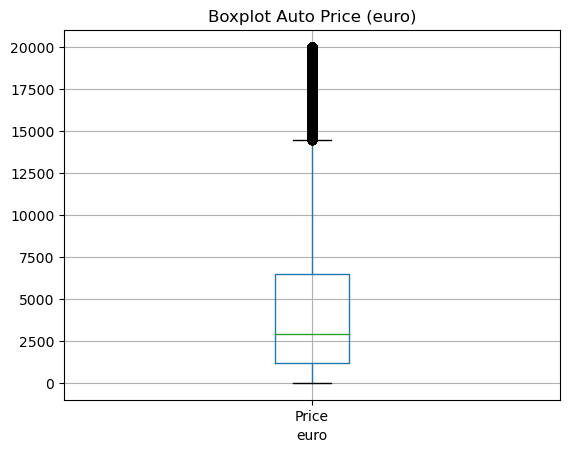

In [8]:
data.boxplot(column=['Price'])
plt.title('Boxplot Auto Price (euro)')
plt.xlabel('euro')
display(data['Price'].describe())
plt.show()

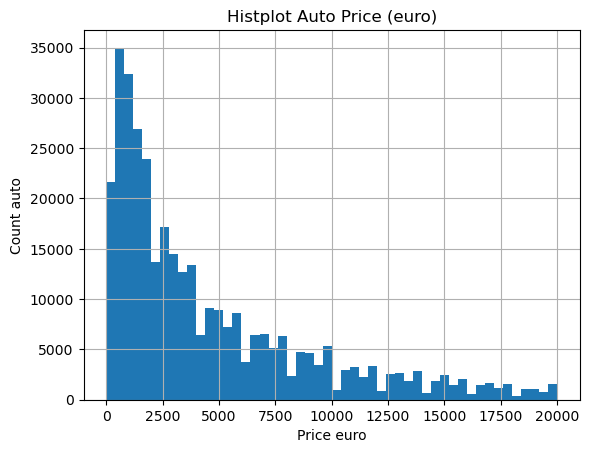

In [9]:
data['Price'].hist(bins=50)
plt.xlabel('Price euro')
plt.ylabel('Count auto')
plt.title('Histplot Auto Price (euro)')
plt.show()

From the data obtained, we conclude that abnormally high prices are in the range of 14,100 euros and above, and abnormally low prices from 1 to 1000 euros. Let us get rid of them:

In [10]:
data = data.loc[data['Price'] >= 1000]
data = data.loc[data['Price'] <= 14100]

Let's check the `Model` feature for anomalies:

In [11]:
print('Number of ads with a blank model:', len(data.loc[data['Model'].isna()]))

Number of ads with a blank model: 10794


The feature `Model` is one of the main for predicting the price, missing about 5% of the data, there is no way to recover these data correctly, replace them with 'unknown':

In [12]:
data['Model'] = data['Model'].fillna('unknown')

Check the `power` feature for anomalies:

count    251415.000000
mean        116.942414
std         195.569344
min           0.000000
25%          75.000000
50%         110.000000
75%         147.000000
max       20000.000000
Name: Power, dtype: float64

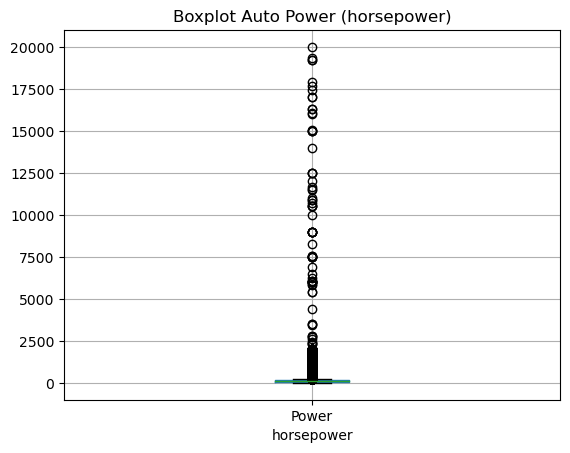

In [13]:
data.boxplot(column=['Power'])
plt.title('Boxplot Auto Power (horsepower)')
plt.xlabel('horsepower')
display(data['Power'].describe())
plt.show()

In [14]:
print('Number of cars with power > 1000 hp.:', len(data.loc[(data['Power'] > 1000)]) /len(data)*100)
print('Number of cars with power 0 hp.:', len(data.loc[(data['Power'] ==0) | (data['Power'] == 0)])/len(data)*100)

Number of cars with power > 1000 hp.: 0.08074299465027941
Number of cars with power 0 hp.: 8.114472087982023


Objects with more than 1000 hp can be deleted, because they constitute a small part of the data (0.08%). But there are a lot of objects with zero power (8.1%), probably in this way the gaps are filled. Deletion of such amount of data is undesirable, but the feature is important enough, and the qualitative recovery on the basis of available data is impossible.

In [15]:
data = data[(data['Power'] <= 1000) & (data['Power'] > 0)]

The `DateCreated` and `LastSeen` features do not affect the price and are not needed for further analysis, so we remove them:

In [16]:
data = data.drop(['DateCreated', 'LastSeen'], axis=1)

Check the `RegistrationYear` feature:

In [17]:
data['RegistrationYear'].sort_values().unique()

array([1000, 1234, 1500, 1800, 1910, 1923, 1928, 1929, 1930, 1931, 1935,
       1937, 1938, 1941, 1942, 1943, 1945, 1948, 1949, 1950, 1951, 1952,
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2800, 2900, 3000, 4000, 4500, 5000, 5911, 6000, 9999],
      dtype=int64)

The data contain obviously erroneous values, let's remove ads with the year of registration before 1910 and after 2019, checking beforehand how many such ads are contained in the feature:

In [18]:
registration_min = data[(data['RegistrationYear'] > 2020)]
registration_max = data[(data['RegistrationYear'] < 1922)]

In [19]:
print('Number of ads with the date of registration of the car later than 2020', registration_min['RegistrationYear'].count())
print('Number of announcements with registration date earlier than 1922', registration_max['RegistrationYear'].count())

Number of ads with the date of registration of the car later than 2020 16
Number of announcements with registration date earlier than 1922 10


Ads containing the wrong date of registration of the car are 111 pcs, let's delete them:

In [20]:
data = data[(data['RegistrationYear'] <= 2020) & (data['RegistrationYear'] >= 1922)]

Let's check how many objects with the date of registration later than the date of downloading the questionnaire:

In [21]:
data['DateCrawled'] = pd.to_datetime(data['DateCrawled'], format='%Y-%m-%d %H:%M:%S')
data[data['RegistrationYear'] > data['DateCrawled'].dt.year]['Price'].count() / data.shape[0] * 100

3.438265051888121

The data on the date of registration that exceeds the date of download is 4%. Let's delete them and then remove the `DateCrawled` feature, it does not affect the price of the car:

In [22]:
data = data[~(data['RegistrationYear'] > data['DateCrawled'].dt.year)]
data = data.drop('DateCrawled', axis=1)

The technical parameters of the features `VehicleType`, `Gearbox`, `FuelType` are most likely the same in the same car models, so let's fill in the blanks with the most common values for the same model:

In [23]:
data['VehicleType'] = data['VehicleType'].fillna(data.groupby('Model')['VehicleType'].transform(lambda x: x.value_counts()
                                                                                                .idxmax()))
data['Gearbox'] = data['Gearbox'].fillna(data.groupby('Model')['VehicleType'].transform(lambda x: x.value_counts().idxmax()))
data['FuelType'] = data['FuelType'].fillna(data.groupby('Model')['VehicleType'].transform(lambda x: x.value_counts().idxmax()))

Let's replace the missing values in the `Repaired` feature with 'unknown', because it is impossible to restore the information about whether the machine was repaired or not, and there are too many missing values to get rid of:

In [24]:
data['Repaired'] = data['Repaired'].fillna('unknown')
data.reset_index(drop=True, inplace=True)

Let's look at the resulting table and see if there are any missing values:

In [25]:
print('Missing values:\n', data.isna().sum())
print()
data.head()

Missing values:
 Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
Repaired             0
dtype: int64



,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired
0,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,unknown
1,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
2,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no
3,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no
4,2000,sedan,2004,manual,105,3_reihe,150000,12,petrol,mazda,no


After making adjustments at the preprocessing stage, let's check how the numerical features correlate with each other:

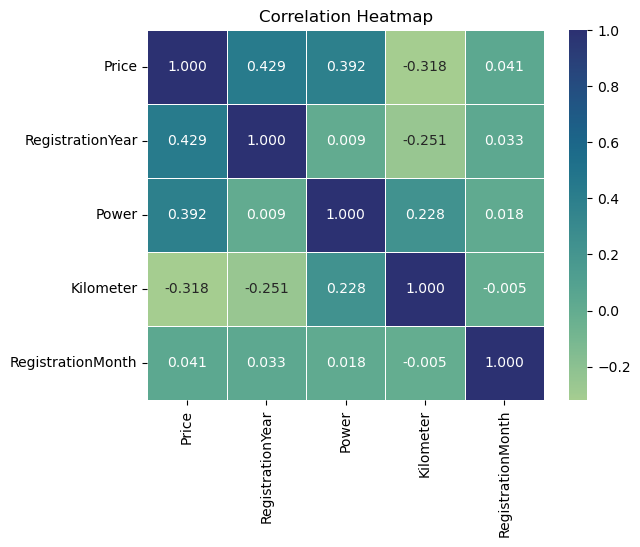

In [26]:
sns.heatmap(data.corr(), annot=True, fmt='.3f', linewidth=.5, cmap='crest')
plt.title('Correlation Heatmap')
plt.show()

Most of all, the price is affected by the power of the car and the year of registration, the dependence is direct: the higher these indicators, the higher the price. Also the mileage of the car affects the price, here we see the opposite dependence: the higher the mileage, the lower the cost of the car. The data look logical.

**Conclusion:**
- imported pandas, numpy and sklearn libraries for further work and examined the data
- we detected and removed duplicates; we also replaced the values with the correct ones and if they could not be restored, removed the listings with the missing values
- abnormal values in features 'Price' and 'RegistrationYear' were detected and removed
- The technical parameters of the features 'VehicleType', 'Gearbox', 'FuelType' are likely to coincide in identical models of cars, so we filled the gaps with the most frequently occurring values for the same model
- After the adjustments made at the preprocessing stage, we checked how the features correlate to each other and found that the price is most influenced by the power of the car and the year of registration, the relationship is direct: the higher these figures are, the higher the price. Also, the mileage affects the price - here we see the inverse dependence: the higher the mileage, the lower the price of the car. The data look logical.

## Model training

The features `VehicleType`, `Gearbox`, `FuelType`, `Repaired`, `Brand`, and `Model` will be encoded by direct encoding:

In [27]:
def get_dummies_func(data, column, prefix):
    df = pd.get_dummies(data[column], prefix=prefix, drop_first=True)
    data = data.drop(column, axis=1)
    return data.join(df)

In [28]:
data_coded = data
data_coded = get_dummies_func(data_coded, 'VehicleType', 'VType')
data_coded = get_dummies_func(data_coded, 'Gearbox', 'Gear')
data_coded = get_dummies_func(data_coded, 'FuelType', 'Fuel')
data_coded = get_dummies_func(data_coded, 'Repaired', 'Repair')
data_coded = get_dummies_func(data_coded, 'Brand', 'Brand')
data_coded = get_dummies_func(data_coded, 'Model', 'Model')
data_coded.tail(5)

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,VType_convertible,VType_coupe,VType_other,VType_sedan,VType_small,...,Model_wrangler,Model_x_reihe,Model_x_trail,Model_x_type,Model_xc_reihe,Model_yaris,Model_yeti,Model_ypsilon,Model_z_reihe,Model_zafira
222845,5250,2016,150,150000,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
222846,3200,2004,225,150000,5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
222847,1199,2000,101,125000,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
222848,9200,1996,102,150000,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
222849,3400,2002,100,150000,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's save the features and the target feature in the `features` and `target` variables and divide the sample into the training and test samples at a ratio of 4:1:

In [29]:
features = data_coded.drop('Price',axis=1)
target = data_coded['Price']
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2,
                                                                            random_state=12345)
print(f'The size of the training sample: {len (features_train) / len(data_coded):.0%}')
print(f'The size of the test sample: {len (features_test) / len(data_coded):.0%}')

The size of the training sample: 80%
The size of the test sample: 20%


Let us scale the features to a standard normal distribution using the StandardScaler method of the sklearn library:

In [30]:
numeric = ['RegistrationYear', 'Power', 'Kilometer', 'RegistrationMonth']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
features_train.sample(5)

,RegistrationYear,Power,Kilometer,RegistrationMonth,VType_convertible,VType_coupe,VType_other,VType_sedan,VType_small,VType_suv,...,Model_wrangler,Model_x_reihe,Model_x_trail,Model_x_type,Model_xc_reihe,Model_yaris,Model_yeti,Model_ypsilon,Model_z_reihe,Model_zafira
17419,1.078927,0.318874,-0.783703,-0.602947,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94759,0.753246,-0.072191,-0.089635,0.812404,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72049,-1.037997,-1.245385,0.604432,-0.602947,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
169908,-0.223796,-0.952087,-0.089635,1.095474,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7178,0.753246,1.296535,0.604432,1.095474,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's create a constant model. It will always predict the average value of `Price`, let's calculate the RMSE for the model:

In [31]:
print('RMSE of the constant model on the test sample:',
      (mean_squared_error(target_test, pd.Series(target_train.mean(), index=target_test.index)) ** 0.5).round(5))

RMSE of the constant model on the test sample: 3403.98062


Train the **linear model**. Calculate the learning rate, prediction rate, and RMSE of the model. We will train the model using cross validation:

In [32]:
%%time
lm = LinearRegression()
rmse = cross_val_score(lm, features_train, target_train, cv=3, n_jobs=-1, scoring='neg_root_mean_squared_error')
print('RMSE for the linear model on the crossvalidation sample:', round((-rmse.mean()), 5))

RMSE for the linear model on the crossvalidation sample: 2153.00546
Wall time: 39.6 s


In [33]:
%%time
lm.fit(features_train, target_train)

Wall time: 6.14 s


LinearRegression()

In [34]:
%%time
preds_lm = lm.predict(features_train)
mse_lm = mean_squared_error(target_train, preds_lm)
print('RMSE for the linear model on the training sample:', round((mse_lm) ** 0.5, 5))

RMSE for the linear model on the training sample: 2147.39194
Wall time: 396 ms


The speed of operations is sufficiently high. 

Let's train linear models with regularization. **Lasso:**

In [35]:
%%time
start = (-(cross_val_score(Lasso(alpha=0.1), features_train, target_train, cv=3, n_jobs=-1,
                           scoring='neg_root_mean_squared_error').mean()))
best_alpha = []
best_rmse = 0
alphas = np.arange(0.1, 1, 0.1)
for alpha in alphas:
    lasso = Lasso(alpha = alpha)
    rmse = cross_val_score(lasso, features_train, target_train, cv=3, n_jobs=-1, scoring='neg_root_mean_squared_error')
    rmse = (-rmse.mean())
    if rmse <= start:
        best_alpha = alpha
        best_rmse = rmse
print('RMSE for Lasso model on crossvalidation sampling: alpha={:.1f} {:.5f}'.format(best_alpha, best_rmse))

RMSE for Lasso model on crossvalidation sampling: alpha=0.1 2154.09121
Wall time: 27min 42s


In [36]:
%%time
lasso = Lasso(alpha=0.1)
lasso.fit(features_train, target_train)

Wall time: 1min 54s


Lasso(alpha=0.1)

In [37]:
%%time
preds_ls = lasso.predict(features_train)
mse_ls = mean_squared_error(target_train, preds_ls)
print('RMSE for the Lasso model on the training sample:', round((mse_ls) ** 0.5, 5))

RMSE for the Lasso model on the training sample: 2149.35143
Wall time: 433 ms


Lasso did not significantly improve the RMSE metric, the training and prediction rates are lower than those of the linear model without regularization.

**Ridge:**

In [38]:
%%time
start = (-(cross_val_score(Ridge(alpha=0.1), features_train, target_train, cv=3, n_jobs=-1,
                           scoring='neg_root_mean_squared_error').mean()))
best_alpha = []
best_rmse = 0
alphas = np.arange(0.1, 1, 0.1)
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    rmse = cross_val_score(ridge, features_train, target_train, cv=3, n_jobs=-1, scoring='neg_root_mean_squared_error')
    rmse = (-rmse.mean())
    if rmse <= start:
        best_alpha = alpha
        best_rmse = rmse
print('RMSE for Ridge model on crossvalidation sampling: alpha={:.1f} {:.5f}'.format(best_alpha, best_rmse))

RMSE for Ridge model on crossvalidation sampling: alpha=0.9 2152.91341
Wall time: 55.6 s


In [39]:
%%time
ridge = Ridge(alpha=0.9)
ridge.fit(features_train, target_train)

Wall time: 1.93 s


Ridge(alpha=0.9)

In [40]:
%%time
preds_rg = ridge.predict(features_train)
mse_rg = mean_squared_error(target_train, preds_rg)
print('RMSE for the Ridge model on the training sample:', round((mse_rg) ** 0.5, 5))

RMSE for the Ridge model on the training sample: 2147.46871
Wall time: 401 ms


**Ridge has a slightly increased metric and a higher learning rate than the previous two models:**
- Ridge fit time: 1.02 ms
- Lasso fit time: 1 m
- LinearRegression fit time: 4.42 s

Let's train the model with gradient boosting **LightGBM**. We will select the parameters with the help of GridSearch library sklearn:

In [41]:
numerical_features = ['DateCreated', 'RegistrationYear', 'Power', 'Kilometer', 'LastSeen']
categorical_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Repaired', 'Brand']
categorical_features = [i for i in list(data_coded.columns) if i not in numerical_features]

In [42]:
%%time
train_data = lightgbm.Dataset(features_train, label=target_train, 
                              free_raw_data=False,
                              categorical_feature=categorical_features)
test_data = lightgbm.Dataset(features_test, label=target_test)
param_grid = {'learning_rate': [0.1, 0.3, 0.5, 0.7], 
              'max_depth': [3, 5, 7, 9], 
              'random_state': [12345]}
lgbm = lightgbm.LGBMRegressor()
grid_search = GridSearchCV(estimator = lgbm, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1, 
                           verbose = 10,
                           scoring = 'neg_root_mean_squared_error')
grid_search.fit(features_train, target_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Wall time: 2min 9s


GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.7],
                         'max_depth': [3, 5, 7, 9], 'random_state': [12345]},
             scoring='neg_root_mean_squared_error', verbose=10)

In [43]:
print('Parameters of the best model:', grid_search.best_params_)
print('RMSE for LightGBM model:', -(grid_search.best_score_))

Parameters of the best model: {'learning_rate': 0.5, 'max_depth': 9, 'random_state': 12345}
RMSE for LightGBM model: 1394.9078098198854


In [44]:
%%time
lgbm = lightgbm.LGBMRegressor(learning_rate = 0.5, max_depth = 9, random_state = 12345)
lgbm.fit(features_train, target_train)

Wall time: 2.95 s


LGBMRegressor(learning_rate=0.5, max_depth=9, random_state=12345)

In [45]:
%%time
preds_lgbm = lgbm.predict(features_train)
mse_lgbm = mean_squared_error(target_train, preds_lgbm)
print('RMSE for the LightGBM model on the training sample:', round((mse_lgbm) ** 0.5, 5))

RMSE for the LightGBM model on the training sample: 1326.8299
Wall time: 1.54 s


**Conclusion:**
- we prepared samples for model training
- coded categorical features by direct coding method
- kept in variables `features` and `target` features and target feature
- divided the sample into training, validation and test samples in the ratio of 60:20:20
- trained linear regression models without regularization, Lasso and Ridge with regularization and the LightGBM gradient boosting model
- we measured the training time, prediction time, and model prediction quality using the RMSE metric.

## Model analysis

All of the trained models were able to improve the RMSE of the constant model. The linear model without regularization for this problem showed prediction quality close to that of Lasso and Ridge. The RMSE metric on the validation sample for **LightGBM** is half as good. **Prediction quality**:
- **LightGBM rmse: 1394.38922**.
- Ridge rmse: 2139.02252
- LinearRegression rmse: 2139.16757
- Lasso rmse: 2140.44898
- Constant model rmse: 3403.90138

In terms of learning time **Ridge** model is the fastest, LightGBM time is not significantly different. Lasso is inferior to the linear model without regularization. **Model learning time**:
- **Ridge fit time: 1.02 ms**
- LightGBM fit time: 2.42 ms
- LinearRegression fit time: 4.42 s
- Lasso fit time: 1.1 m

As for the prediction times, the linear models predict approximately the same, the LightGBM predicts several times faster than the others **Lasso predictions time:**
- **Lasso predictions time: 103 ms**
- LinearRegression predictions time: 116 ms
- Ridge predictions time: 139 ms
- LightGBM predictions time: 1.1 s

From the data it follows that the best model is LightGBM (RMSE 1394, fit time 2.42 ms, predictions time 1.1 s). Its quality is far ahead of the other models, and the speed is just as high. Let's check its quality on a test sample:

In [46]:
%%time
preds_lgbm_test = lgbm.predict(features_test)
mse_lgbm_test = mean_squared_error(target_test, preds_lgbm_test)
print('RMSE for the LightGBM model on the test sample:', round((mse_lgbm_test) ** 0.5, 5))

RMSE for the LightGBM model on the test sample: 1384.92901
Wall time: 447 ms


**General conclusion:**
- imported pandas, numpy and sklearn libraries for further work and examined the data
- we detected and removed duplicates; we also replaced the values with the right ones and if they could not be recovered, removed the missing announcements
- abnormal values in the features were detected and removed.
- The technical parameters of the features `VehicleType`, `Gearbox`, `FuelType` most likely coincide in the same vehicle models, so we filled the gaps with the most common values for the same model
- After the adjustments made at the preprocessing stage, we checked how the features correlate to each other and found that the price is most influenced by the power of the car and the year of registration, the correlation is direct: the higher these figures are, the higher the price. Also the mileage affects the price - here we see the inverse relationship: the higher the mileage, the lower the price of the car
- we prepared the samples for training models
- coded categorical features using the method of direct coding
- stored the features and the target feature in the `features` and `target` variables
- divided the sample into training and test samples in the ratio of 80:20
- trained linear regression models without regularization, Lasso and Ridge with regularization and the LightGBM gradient boosting model
- we have measured the training time, prediction time and model prediction quality using the RMSE metric
- evaluated the quality, the training time, the model prediction time and determined the best model - LightGBM (RMSE 1394, fit time 2 ms, predictions time 1s)
- tested its quality using RMSE metric on a test sample (1384)